In [2]:
# importing all required packages at the start of the notebook
import IPython
import os
import pandas as pd
import qiime2 as q2
from qiime2 import Visualization
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
os.getcwd() #Get the working directory

'/home/jovyan/assignments/FunGut-Project'

In [4]:
data_dir = "/home/jovyan/assignments/FunGut-Project/project_data" #Store the folder's path

# Analysis of the sample metadata

In [18]:
sample_metadata = pd.read_csv("project_data/fungut_metadata.tsv", sep="\t", na_values=["Not provided"])
sample_metadata.head()

,ID,country_sample,state_sample,latitude_sample,longitude_sample,sex_sample,age_years_sample,height_cm_sample,weight_kg_sample,bmi_sample,diet_type_sample,ibd_sample,gluten_sample
0,ERR5327198,USA,TN,36.1,-86.8,female,67.0,152.0,41.0,17.75,Omnivore,I do not have this condition,No
1,ERR5327199,USA,DC,38.9,-77.1,male,55.0,182.0,79.0,23.73,Omnivore,I do not have this condition,I was diagnosed with gluten allergy (anti-glut...
2,ERR5327266,USA,VA,38.9,-77.1,female,28.0,175.0,61.0,19.94,Omnivore,I do not have this condition,I do not eat gluten because it makes me feel bad
3,ERR5327282,United Kingdom,NaN,51.6,-0.2,female,26.0,166.0,60.0,21.77,Omnivore,I do not have this condition,No
4,ERR5327284,United Kingdom,NaN,51.5,-0.2,female,25.0,173.0,59.0,20.01,Vegetarian but eat seafood,I do not have this condition,No


In [7]:
sample_metadata.dtypes

ID                   object
country_sample       object
state_sample         object
latitude_sample     float64
longitude_sample    float64
sex_sample           object
age_years_sample    float64
height_cm_sample    float64
weight_kg_sample    float64
bmi_sample          float64
diet_type_sample     object
ibd_sample           object
gluten_sample        object
dtype: object

## Specific questions from our FunGut guidelines

### Sex ratio

Text(0.5, 0.98, 'Sex ratio')

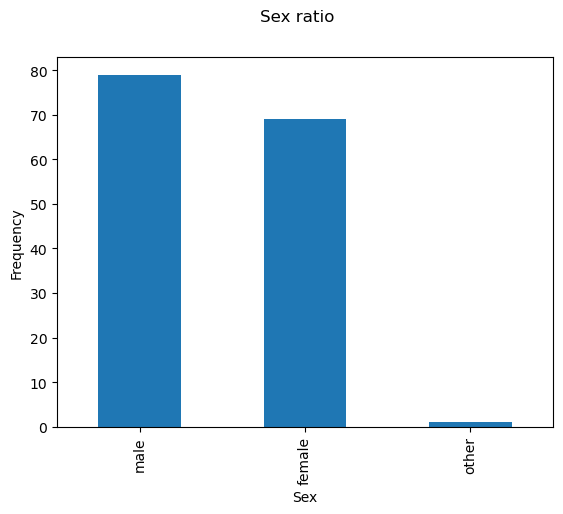

In [17]:
sample_metadata["sex_sample"].value_counts().plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.suptitle("Sex ratio")

### Distribution of age, height and weight

Text(0.5, 0.98, 'Age distribution')

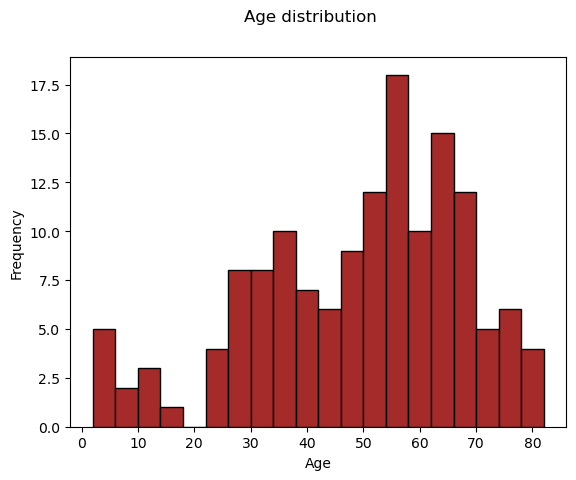

In [18]:
sample_metadata["age_years_sample"].plot.hist(bins=20, edgecolor="black", color="brown")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.suptitle("Age distribution")

In [22]:
sample_metadata["age_years_sample"].max()

82.0

In [23]:
sample_metadata["age_years_sample"].min()

2.0

In [28]:
bins_age = range(2, 92, 10)
list(bins_age)

[2, 12, 22, 32, 42, 52, 62, 72, 82]

In [31]:
labels_bins_age = [f"{i}-{i+10}" for i in range(2, 82, 10)]
labels_bins_age

['2-12', '12-22', '22-32', '32-42', '42-52', '52-62', '62-72', '72-82']

In [33]:
sample_metadata["age_range"] = pd.cut(
    sample_metadata["age_years_sample"],
    bins=bins_age,
    labels=labels_bins_age,
    right=True,
    include_lowest=True
)

In [36]:
sample_metadata.head()

,ID,country_sample,state_sample,latitude_sample,longitude_sample,sex_sample,age_years_sample,height_cm_sample,weight_kg_sample,bmi_sample,diet_type_sample,ibd_sample,gluten_sample,age_range
0,ERR5327198,USA,TN,36.1,-86.8,female,67.0,152.0,41.0,17.75,Omnivore,I do not have this condition,No CD,62-72
1,ERR5327199,USA,DC,38.9,-77.1,male,55.0,182.0,79.0,23.73,Omnivore,I do not have this condition,No CD / Gluten allergy,52-62
2,ERR5327266,USA,VA,38.9,-77.1,female,28.0,175.0,61.0,19.94,Omnivore,I do not have this condition,No CD / Doesn't eat gluten,22-32
3,ERR5327282,United Kingdom,NaN,51.6,-0.2,female,26.0,166.0,60.0,21.77,Omnivore,I do not have this condition,No CD,22-32
4,ERR5327284,United Kingdom,NaN,51.5,-0.2,female,25.0,173.0,59.0,20.01,Vegetarian but eat seafood,I do not have this condition,No CD,22-32


In [38]:
sample_metadata["age_range"].plot(bins=20, edgecolor="black", color="brown")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.suptitle("Age distribution")

TypeError: no numeric data to plot

We might want to make age groups for the rest of our analysis. However I don't know how we should divid it, as the microbiome changes with age, so just dividing it might not be a good idea. Doing this we would have to check that our groups have not too different numbers of samples I guess.

Text(0.5, 0.98, 'Height distribution')

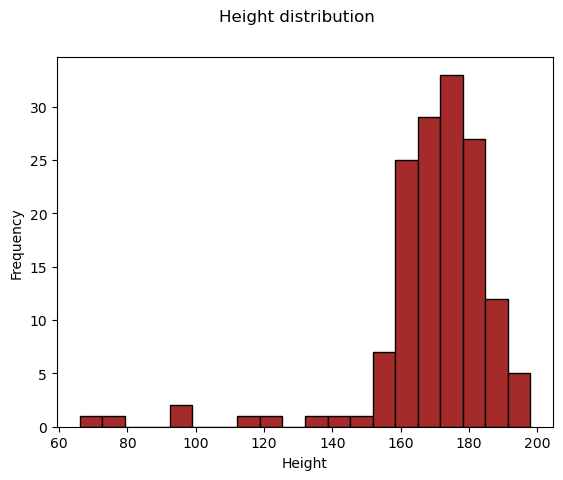

In [19]:
sample_metadata["height_cm_sample"].plot.hist(bins=20, edgecolor="black", color="brown")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.suptitle("Height distribution")

The tiny ones are probably also the young ones

Text(0.5, 0.98, 'Weight distribution')

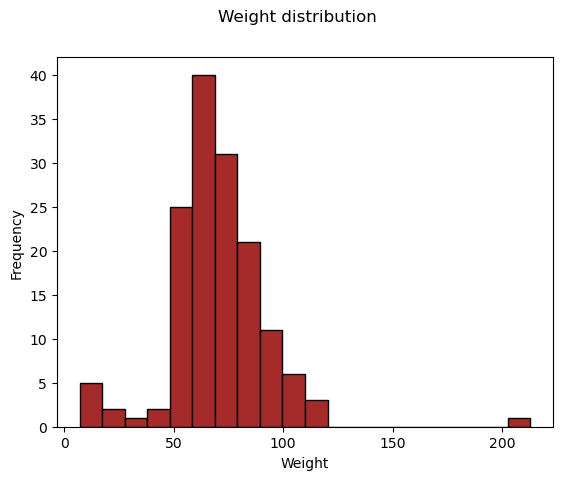

In [20]:
sample_metadata["weight_kg_sample"].plot.hist(bins=20, edgecolor="black", color="brown")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.suptitle("Weight distribution")

Probably most of them have a link with age/sex. BMI is a good indicator

### Types of diet

Text(0.5, 0.98, 'Types of diet')

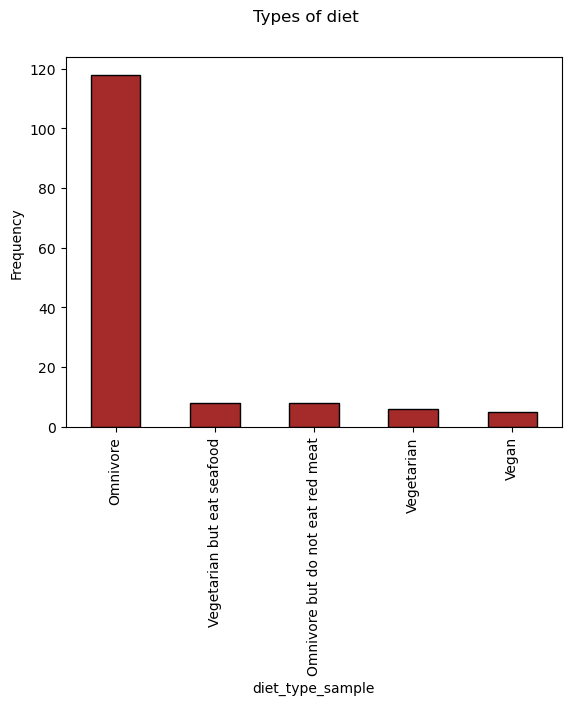

In [21]:
sample_metadata["diet_type_sample"].value_counts().plot(kind="bar", edgecolor="black", color="brown")
plt.ylabel("Frequency")
plt.suptitle("Types of diet")

### Diseases

Information about inflammatory bowel disease (IBD) and celiac disease (CD) were collected in the sample metadata.

Text(0.5, 0.98, 'IBD prevalence')

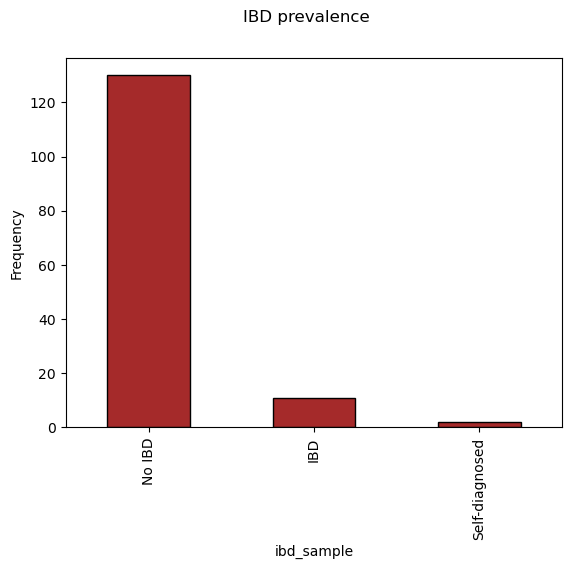

In [22]:
sample_metadata.replace({"ibd_sample":"I do not have this condition"}, "No IBD", inplace=True)
sample_metadata.replace({"ibd_sample":"Diagnosed by a medical professional (doctor, physician assistant)"}, "IBD", inplace=True)
sample_metadata["ibd_sample"].value_counts().plot(kind="bar", edgecolor="black", color="brown")
plt.ylabel("Frequency")
plt.suptitle("IBD prevalence")

Text(0.5, 0.98, 'CD prevalence')

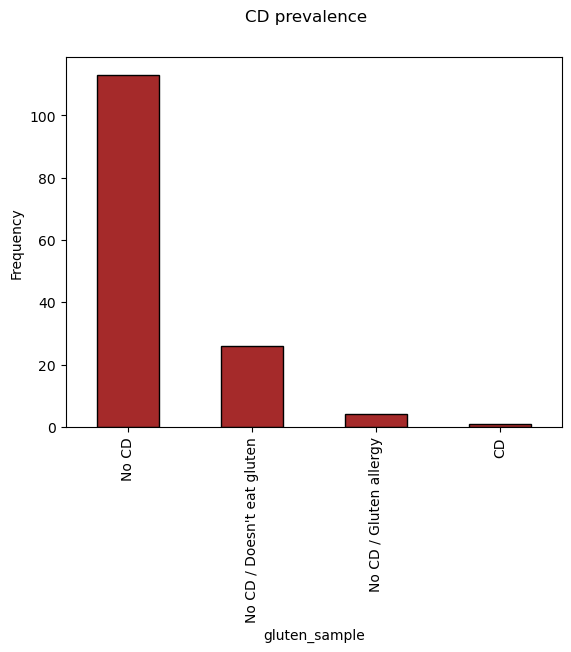

In [20]:
sample_metadata.replace({"gluten_sample":"No"}, "No CD", inplace=True)
sample_metadata.replace({"gluten_sample":"I do not eat gluten because it makes me feel bad"}, "No CD / Doesn't eat gluten", inplace=True)
sample_metadata.replace({"gluten_sample":"I was diagnosed with gluten allergy (anti-gluten IgG), but not celiac disease"}, "No CD / Gluten allergy", inplace=True)
sample_metadata.replace({"gluten_sample":"I was diagnosed with celiac disease"}, "CD", inplace=True)
sample_metadata["gluten_sample"].value_counts().plot(kind="bar", edgecolor="black", color="brown")
plt.ylabel("Frequency")
plt.suptitle("CD prevalence")

### Origin - Country / industrialisation index

In [10]:
# sample_metadata.to_csv("project_data/fungut_metadata_updated.tsv", sep="\t", index=False)
# This is what I do in the end to have a new csv file to use for the taxonomy